<a href="https://colab.research.google.com/github/ajaye2901/Star-Type-Prediction/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About the Dataset**



*  Absolute Temperature (in K)
*  Relative Luminosity (L/Lo)
*  Relative Radius (R/Ro)
*  Absolute Magnitude (Mv)
*  Star Color (white,Red,Blue,Yellow,yellow-orange etc)
*  Spectral Class (O,B,A,F,G,K,M)
*  Star Type(Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants,HyperGiants)

Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)




Ro = 6.9551 x 10^8 m (Avg Radius of Sun)














**Star Types**


*   Brown Dwarf - Star type 0
*   Red Dwarf - Star type 1
*   White Dwarf - Star type 2
*   Main Sequence - Star type 3
*   Super Giant - Star type 4
*   Hyper Giant - Star type 5

**Spectral Class**



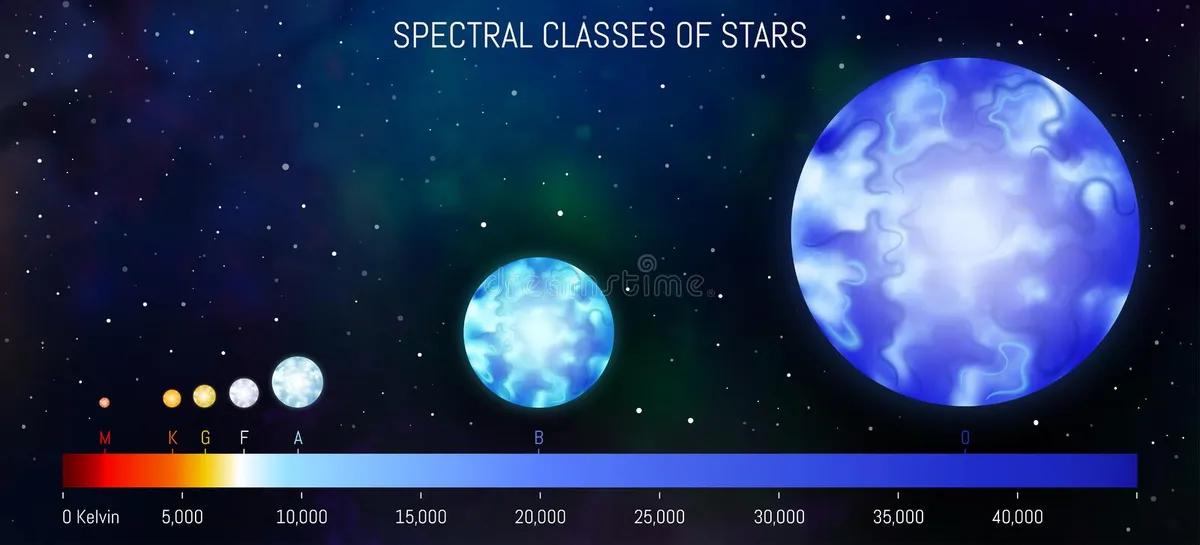

In [ ]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay


Loading the Dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/6 class csv.csv')
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


Checking for missing values

In [ ]:
df.isna().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

In [ ]:
df['Star color'].value_counts()

Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
Yellowish White         3
white                   3
Whitish                 2
Orange                  2
yellowish               2
Pale yellow orange      1
White-Yellow            1
Blue                    1
Yellowish               1
Orange-Red              1
Blue white              1
Blue-White              1
Name: Star color, dtype: int64

In [ ]:
df['Spectral Class'].value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral Class, dtype: int64

Encoding string values to integer values

In [ ]:
le=LabelEncoder()
df['Star color']=le.fit_transform(df['Star color'])
df['Spectral Class']=le.fit_transform(df['Spectral Class'])
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,10,5
1,3042,0.000500,0.1542,16.60,0,10,5
2,2600,0.000300,0.1020,18.70,0,10,5
3,2800,0.000200,0.1600,16.65,0,10,5
4,1939,0.000138,0.1030,20.06,0,10,5
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,0,6
236,30839,834042.000000,1194.0000,-10.63,5,0,6
237,8829,537493.000000,1423.0000,-10.73,5,11,0
238,9235,404940.000000,1112.0000,-11.23,5,11,0


Types of each column

In [ ]:
df.dtypes

Temperature (K)             int64
Luminosity(L/Lo)          float64
Radius(R/Ro)              float64
Absolute magnitude(Mv)    float64
Star type                   int64
Star color                  int64
Spectral Class              int64
dtype: object

Count of Each star colour in the dataset

In [ ]:
df['Star color'].value_counts()

10    112
0      55
6      26
2      10
17      8
11      7
3       3
15      3
16      3
13      2
7       2
18      2
9       1
12      1
1       1
14      1
8       1
4       1
5       1
Name: Star color, dtype: int64

Count of each spectral class in the dataset

In [ ]:
df['Spectral Class'].value_counts()

5    111
1     46
6     40
0     19
2     17
4      6
3      1
Name: Spectral Class, dtype: int64

From the below plot we get count of each star type

<AxesSubplot:xlabel='Star type', ylabel='count'>

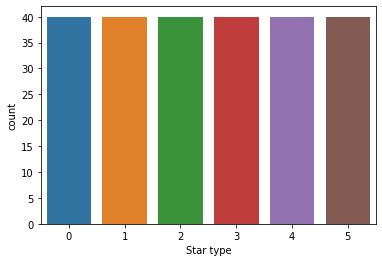

In [ ]:
sns.countplot(df['Star type'])

From the below plot we get count of each star color

<AxesSubplot:xlabel='Star color', ylabel='count'>

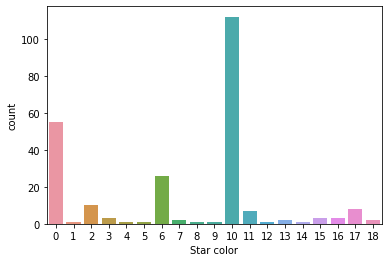

In [ ]:
sns.countplot(df['Star color'])

From the below plot we get count of each spectral class

<AxesSubplot:xlabel='Spectral Class', ylabel='count'>

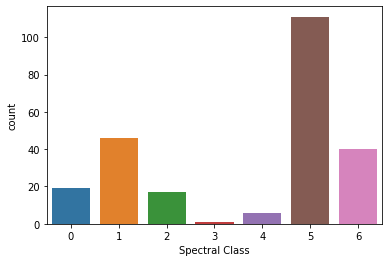

In [ ]:
sns.countplot(df['Spectral Class'])

below plot shows the distribution of Star Types among Spectral Classes

<AxesSubplot:xlabel='Spectral Class', ylabel='Star type'>

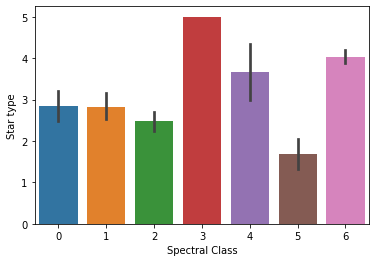

In [ ]:
sns.barplot(x='Spectral Class',y='Star type',data=df)

below plot shows the distribution of Star Types among Star color

<AxesSubplot:xlabel='Star color', ylabel='Star type'>

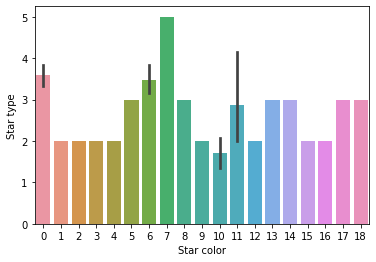

In [ ]:
sns.barplot(x='Star color',y='Star type',data=df)

**Pairplot**

Each variable in a dataset is plotted against every other variable. This allows you to quickly visualize the pairwise relationships between variables in a dataset.

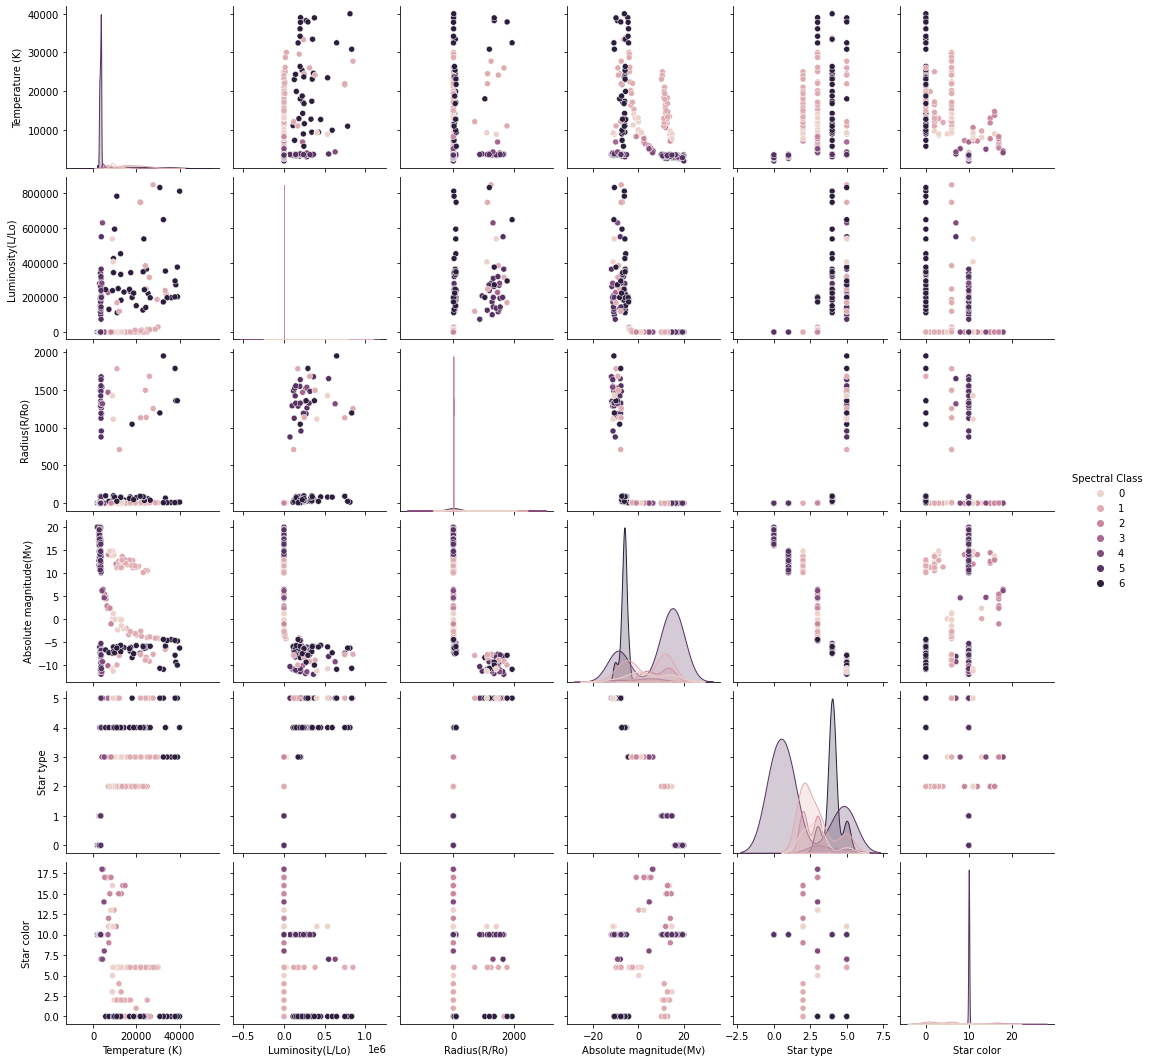

In [ ]:
sns.pairplot(df,hue='Spectral Class')

**Distplot**

creates a histogram and an estimate of the probability density function of a univariate distribution of data.

<AxesSubplot:xlabel='Temperature (K)'>

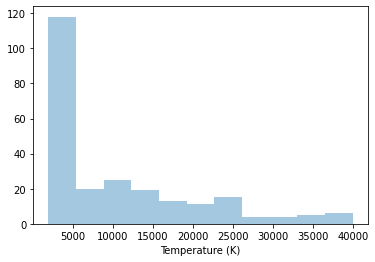

In [ ]:
sns.distplot(df['Temperature (K)'],kde=False)

<AxesSubplot:xlabel='Luminosity(L/Lo)'>

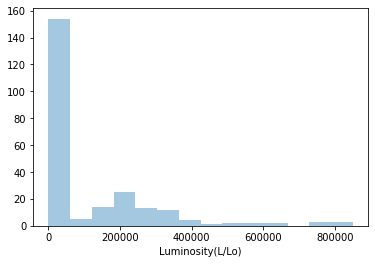

In [ ]:
sns.distplot(df['Luminosity(L/Lo)'],kde=False)

<AxesSubplot:xlabel='Radius(R/Ro)'>

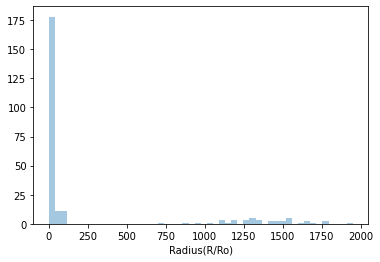

In [ ]:
sns.distplot(df['Radius(R/Ro)'],kde=False)

<AxesSubplot:xlabel='Absolute magnitude(Mv)'>

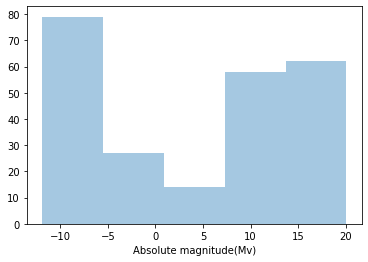

In [ ]:
sns.distplot(df['Absolute magnitude(Mv)'],kde=False)

In [ ]:
df.corr()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
Temperature (K),1.000000,0.393404,0.064216,-0.420261,0.411129,-0.697438,-0.207852
Luminosity(L/Lo),0.393404,1.000000,0.526516,-0.692619,0.676845,-0.393509,0.275280
Radius(R/Ro),0.064216,0.526516,1.000000,-0.608728,0.660975,-0.000818,0.097124
Absolute magnitude(Mv),-0.420261,-0.692619,-0.608728,1.000000,-0.955276,0.333552,-0.085840
Star type,0.411129,0.676845,0.660975,-0.955276,1.000000,-0.317103,-0.049131
Star color,-0.697438,-0.393509,-0.000818,0.333552,-0.317103,1.000000,-0.006298
Spectral Class,-0.207852,0.275280,0.097124,-0.085840,-0.049131,-0.006298,1.000000


<AxesSubplot:>

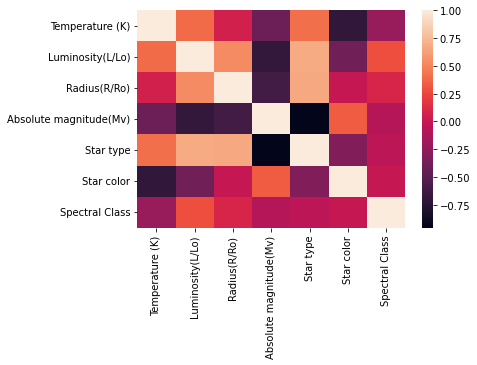

In [ ]:
sns.heatmap(df.corr())

In [ ]:
cols2=['Temperature (K)','Luminosity(L/Lo)','Radius(R/Ro)','Absolute magnitude(Mv)']

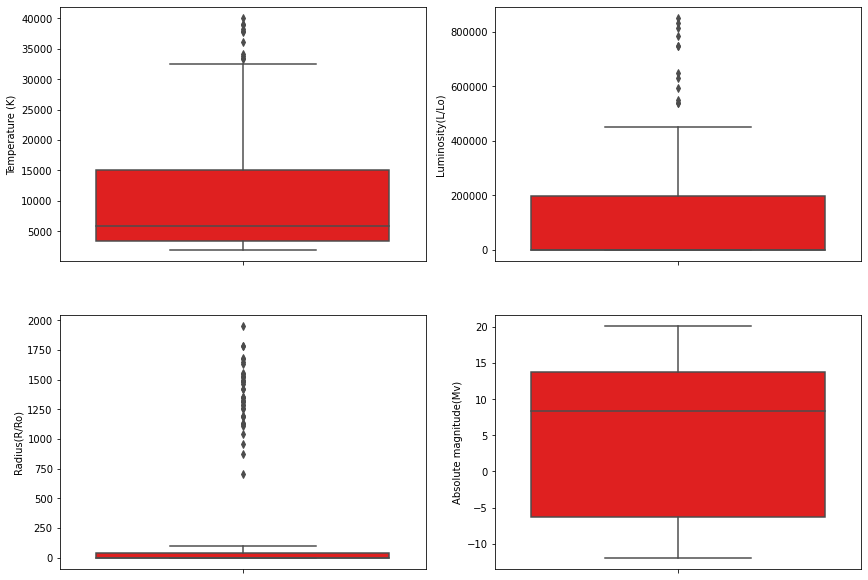

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(12,8))
index=0
ax=ax.flatten()
for col in cols2:
  sns.boxplot(y=col, data=df, color='r', ax=ax[index])
  index+=1
plt.tight_layout(pad=0.5, w_pad=1, h_pad=5.0)

Splitting the dataset into X and y

In [ ]:
X=df.drop(['Star type'],axis=1)
X=X.values
y=df['Star type'].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.2)

64.58333333333334


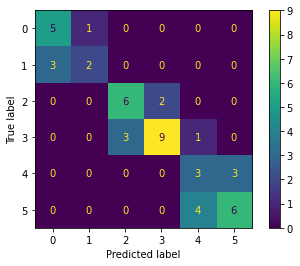

In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

79.16666666666666


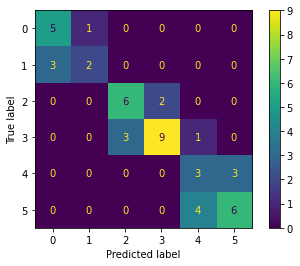

In [ ]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred1=nb.predict(X_test)
y_pred1
print(accuracy_score(y_test,y_pred1)*100)
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

100.0


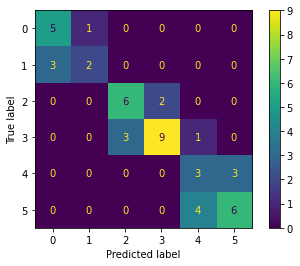

In [ ]:
Dclf=DecisionTreeClassifier()
Dclf.fit(X_train,y_train)
y_pred3=Dclf.predict(X_test)
y_pred3
print(accuracy_score(y_test,y_pred3)*100)
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

100.0


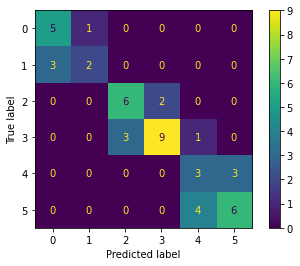

In [ ]:
Rclf=RandomForestClassifier()
Rclf.fit(X_train,y_train)
y_pred4=Rclf.predict(X_test)
y_pred4
print(accuracy_score(y_test,y_pred4)*100)
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
Rclf.predict([[38940,374830,1356.0000,-9.93,0,6]])

array([5])